In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import os
import math
import tftb

(195, 162, 4)
(195, 162)


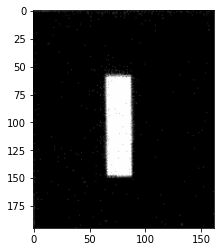

In [14]:
# Read image
img = plt.imread('image_test.png', 0)
print(img.shape)

# Select just one layer (red) and convert to float
U_test = np.array(img[:,:,0], dtype = np.float64)
print(U_test.shape)

plt.imshow(img)
plt.show()

In [15]:
# Convert rgb to gray 
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

In [16]:
# Display the spectrum
def plotSpectre(image, Lx, Ly):
    (Ny, Nx, p) = image.shape
    fxm = Nx*1.0 / (2*Lx)
    fym = Ny*1.0 / (2*Ly)
    plt.imshow(image,extent=[-fxm,fxm,-fym,fym])
    plt.xlabel("fx")
    plt.ylabel("fy")
    
# Convert a matrix into an RGB image matrix
def matriceImage(matrice,gamma,rgb):
    s = matrice.shape
    a=1.0/gamma;
    norm=matrice.max()
    m = np.power(matrice/norm,a)
    im = np.zeros((s[0],s[1],3),dtype=np.float64)
    im[:,:,0] = rgb[0]*m
    im[:,:,1] = rgb[1]*m
    im[:,:,2] = rgb[2]*m
    return im

# Generates an RGB image from a matrix, by applying a logarithmic function
def matriceImageLog(matrice,rgb):
    s = matrice.shape
    m = np.log10(1+matrice)
    min = m.min()
    max = m.max()
    m = (m-min)/(max-min)
    im = np.zeros((s[0],s[1],3),dtype=np.float64)
    im[:,:,0] = rgb[0]*m
    im[:,:,1] = rgb[1]*m
    im[:,:,2] = rgb[2]*m
    return im

(195, 162)


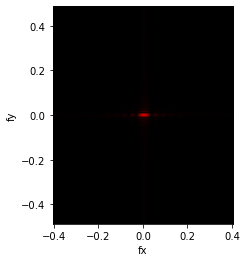

In [17]:
# The discrete Fourier transform
V = np.fft.fft2(U_test)

# Obtain the zero frequency center
VC = np.fft.fftshift(V)

# Calculates the power
P = np.power(np.absolute(VC),2)
print(P.shape)
#plt.imshow(P, cmap = 'gray')
#plt.show()

# Convert to RGB matrix
img = matriceImage(P, 2.0, [1.0,0.0,0.0])

# Display the spectrum
plotSpectre(img, 200.0, 200.0)

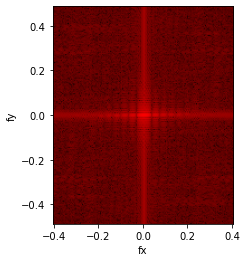

In [18]:
img = matriceImageLog(P,[1.0,0.0,0.0])

# Display the spectrum
plotSpectre(img, 200.0, 200.0)

In [3]:
def loadMatFile(file_path, file_name, key):
    """
    Load a mat file and return an item of the dictionary loaded.
    """    
    # read mat file dictionary
    dictionary = scipy.io.loadmat(file_path + file_name)
    
    # access item of a dictionary
    array = dictionary[key]
    
    return array

In [4]:
# Folder's path
path = 'C:\\Users\\flucasamar\\Desktop\\Github\\computerGeneratedHolography'

# Load hologram dataset
file_path = path + '\\output\\dataset\\'
file_name = 'hDataset.mat'
key = 'hDataset'
dat = loadMatFile(file_path, file_name, key)
dat.shape

(200, 200, 500)

<class 'numpy.complex128'>


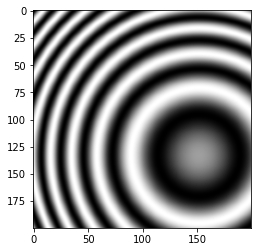

<class 'numpy.complex128'>


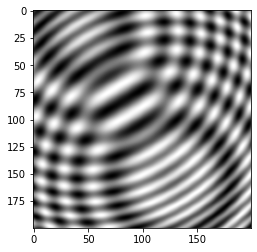

In [7]:
img = dat[:,:,1]
print(type(img[1,1]))

plt.imshow(np.real(img), cmap = 'gray')
plt.show()

img2 = dat[:,:,110]
print(type(img2[1,1]))

plt.imshow(np.real(img2), cmap = 'gray')
plt.show()

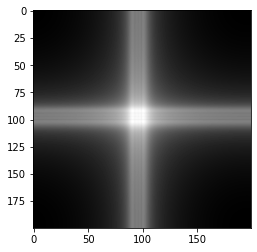

In [11]:
# The discrete Fourier transform
f = np.fft.fft2(img)

# Obtain the zero frequency center
fshift = np.fft.fftshift(f)

# Magnitude spectrum
magnitude_spectrum = 20*np.log(np.abs(fshift))

# Display
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.show()

c:\users\flucasamar\appdata\local\programs\python\python38-32\lib\site-packages\matplotlib\contour.py:1160: ComplexWarning: Casting complex values to real discards the imaginary part
  self.levels = np.asarray(levels_arg).astype(np.float64)


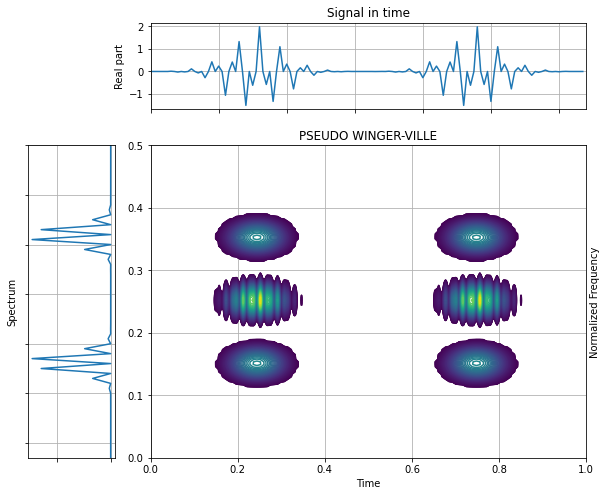

In [12]:
import numpy as np
from tftb.generators import atoms
from tftb.processing import PseudoWignerVilleDistribution

x = np.array([[32, .15, 20, 1],
             [96, .15, 20, 1],
             [32, .35, 20, 1],
             [96, .35, 20, 1]])
g = atoms(128, x)
t = np.linspace(0, 1, 128)
spec = PseudoWignerVilleDistribution(g, timestamps=t)
spec.run()
spec.plot(kind="contour", scale="log", show_tf=True)

In [21]:
a = np.mgrid[:5, :5][0]
a

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

In [37]:
print(np.fft.fft2(a))

[[ 50.  +0.j           0.  +0.j           0.  +0.j
    0.  +0.j           0.  +0.j        ]
 [-12.5+17.20477401j   0.  +0.j           0.  +0.j
    0.  +0.j           0.  +0.j        ]
 [-12.5 +4.0614962j    0.  +0.j           0.  +0.j
    0.  +0.j           0.  +0.j        ]
 [-12.5 -4.0614962j    0.  +0.j           0.  +0.j
    0.  +0.j           0.  +0.j        ]
 [-12.5-17.20477401j   0.  +0.j           0.  +0.j
    0.  +0.j           0.  +0.j        ]]


In [34]:
print(a[1:2,1:2])
print(a[1,1])

[[1]]
1


In [35]:
np.fft.fft2(a[1:2,1:2])

array([[1.+0.j]])

In [61]:
w = np.fft.fft2(img * np.conj(img))
w.shape

(200, 200)

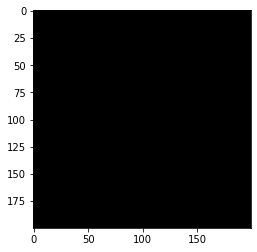

In [62]:
plt.imshow(np.real(w), cmap = 'gray')

In [63]:

def run(self):
    
    lh = (self.fwindow.shape[0] - 1) // 2

    for icol in range(self.ts.shape[0]):

        taumaxvals = (icol, self.signal.shape[0] - icol - 1,
                      np.round(self.n_fbins / 2.0), lh)

        taumax = np.min(taumaxvals)

        tau = np.arange(-taumax, taumax + 1).astype(int)

        indices = np.remainder(self.n_fbins + tau, self.n_fbins).astype(int)

        self.tfr[indices, icol] = self.fwindow[lh + tau] * self.signal[icol + tau] * \
            np.conj(self.signal[icol - tau])

        tau = np.round(self.n_fbins / 2.0)

        if (icol <= self.signal.shape[0] - tau) and (icol >= tau + 1) and (tau <= lh):
            self.tfr[int(tau), icol] = self.fwindow[lh + tau] * \
                self.signal[icol + tau, 0] * np.conj(self.signal[icol - tau, 0]) + \
                self.fwindow[lh - tau] * self.signal[icol - tau, 0] * \
                np.conj(self.signal[icol + tau, 0])
            self.tfr[int(tau), icol] *= 0.5

    self.tfr = np.fft.fft(self.tfr, axis=0
                         )
return np.real(self.tfr), self.ts, self.freqs


IndentationError: unexpected indent (<ipython-input-63-84a741981b6d>, line 2)